# Making it prettier

While it's useful to be able to quickly plot any data we have in front of us, matplotlib's power comes from its configurability. Let's experiment with a dataset and see how much we can change the plot.

Throughout this section we will also need to use some mathematical functions such as $\sin$ and $\cos$. They are provided by `numpy`, or *numerical Python*:

In [1]:
import numpy as np

We'll start with a simple `DataFrame` containing two columns, one with the values of a cosine, the other with the values of a sine.

In [2]:
import matplotlib.pyplot as plt
from pandas import DataFrame

We make `X` which is 254 regularly spaced values from $-\pi$ to $\pi$. We then make the $cos$ and $sin$ data by passing `X` to `np.cos` and `np.sin`:

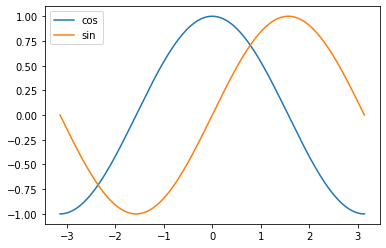

In [3]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
data = {'cos': np.cos(X), 'sin': np.sin(X)}
trig = DataFrame(index=X, data=data)

trig.plot()
plt.show()

You can see that it has plotted the sine and cosine curves between $\pi$ and $-\pi$. Now, let's go through and see how we can affect the display of this plot.

## Changing colours and line widths

First step, we want to have the cosine in blue and the sine in red and a slighty thicker line for both of them. To do this we need separate calls to the plot methods, one for each column in our DataFrame.

In matplotlib, sinple plots are called `Axes` and the "page" as a whole are called `Figure`s. We call the `plt.subplots()` which creates a single page with a single plot on it. It returns a pair of values: `(figure, plot)` which we assign to variables `fig` and `ax`.

We can pass this `Axes` object to our pandas plotting function to tell it where it should plot the data:

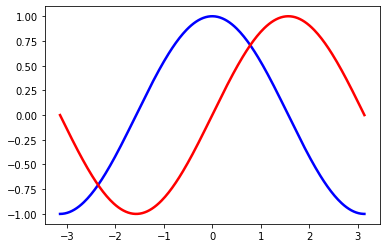

In [4]:
fig, ax = plt.subplots()

trig["cos"].plot(color="blue", linewidth=2.5, linestyle="-", ax=ax)
trig["sin"].plot(color="red", linewidth=2.5, linestyle="-", ax=ax)

plt.show()

### Exercises

- Using the temperature dataset, set the colours of the July and January lines to a warm colour and a cool colour.
- Add in the yearly average column to the plot with a dashed line style.
- [<small>answer</small>](answer_plot_colours.ipynb)

## Setting ticks

Current ticks are not ideal because they do not show the interesting values ($\pm\pi$,$\pm\frac{\pi}{2}$) for sine and cosine. We’ll change them such that they show only these values.

For more advanced specifications of where the ticks should appear, matplotlib provides [tick locators](https://matplotlib.org/gallery/ticks_and_spines/tick-locators.html) but for out simple case, calling `ax.set_xticks` is sufficient.

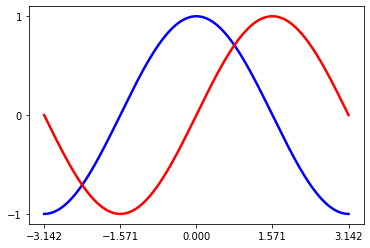

In [5]:
fig, ax = plt.subplots()

trig["cos"].plot(color="blue", linewidth=2.5, linestyle="-", ax=ax)
trig["sin"].plot(color="red", linewidth=2.5, linestyle="-", ax=ax)

### New code
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1, 0, +1])
### End of new code

plt.show()

## Setting tick labels

Ticks are now properly placed but their label is not very explicit. We could guess that 3.142 is $\pi$ but it would be better to make it explicit. When we set tick values, we can also provide a corresponding label in the second argument list. Note that we’ll use LaTeX (by using `$$`) to allow for nice rendering of the label.

For more advanced or automated tick labelling, matplotlib provides [tick formatters](https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html) which can, for example, generate ticks based on a function. For this example, we can stick with just explicitly specifying the ticks.

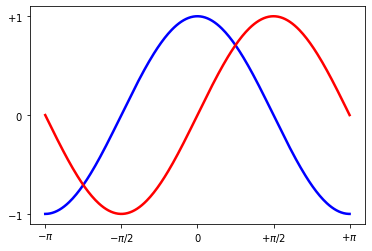

In [6]:
fig, ax = plt.subplots()

trig["cos"].plot(color="blue", linewidth=2.5, linestyle="-", ax=ax)
trig["sin"].plot(color="red", linewidth=2.5, linestyle="-", ax=ax)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1, 0, +1])

### New code
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$'])
### End of new code

plt.show()

## Moving spines

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. We’ll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we’ll hide the top and right and we’ll move the bottom and left ones to coordinate 0 in data-space coordinates.

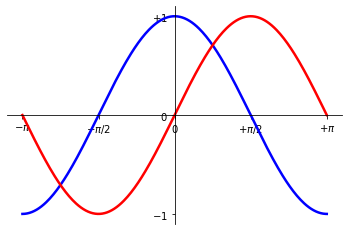

In [7]:
fig, ax = plt.subplots()

trig["cos"].plot(color="blue", linewidth=2.5, linestyle="-", ax=ax)
trig["sin"].plot(color="red", linewidth=2.5, linestyle="-", ax=ax)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1, 0, +1])

ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$'])

### New code
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
### End of new code

plt.show()

## Adding a legend

Let’s add a legend in the upper left corner. This only requires adding a call to `ax.legend` with an optional argument to specify the location of the legend. It takes the labels for the legend from the names of the columns in the pandas `DataFrame`.

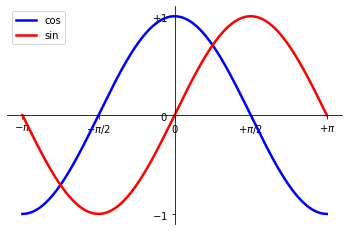

In [8]:
fig, ax = plt.subplots()

trig["cos"].plot(color="blue", linewidth=2.5, linestyle="-", ax=ax)
trig["sin"].plot(color="red", linewidth=2.5, linestyle="-", ax=ax)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1, 0, +1])

ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

### New code
ax.legend(loc='upper left')
### End of new code

plt.show()

## Annotate some points

Let’s annotate some interesting points using the annotate command. We chose the $\frac{2}{3}\pi$ value and we want to annotate both the sine and the cosine. We’ll first draw a marker on the curve as well as a straight dotted line. Then, we’ll use the annotate command to display some text with an arrow.

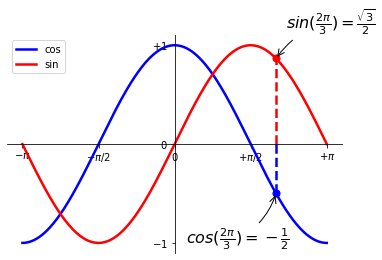

In [9]:
fig, ax = plt.subplots()

trig["cos"].plot(color="blue", linewidth=2.5, linestyle="-", ax=ax)
trig["sin"].plot(color="red", linewidth=2.5, linestyle="-", ax=ax)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1, 0, +1])

ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
ax.set_yticklabels([r'$-1$', r'$0$', r'$+1$'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left')

### New code
# `t` is the x-value that we want to annotate.
# We will get the y-value with `np.cos(t)` or `np.sin(t)`
t = 2 * np.pi / 3
# Draw the blue dotted line
ax.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
# Draw the blue dot
ax.scatter([t, ], [np.cos(t), ], 50, color='blue')
# Draw the text label and arrow
ax.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Draw the red dotted line
ax.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
# Draw the red dot
ax.scatter([t, ],[np.sin(t), ], 50, color='red')
# Draw the text label and arrow
ax.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(+10, +30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
### End of new code

plt.show()

Now you know how to make different modifications to your plots we can make some of these changes to our temperature data.

### Exercise

Going back to your temperature data plot:
- Add in a legend for the data.
- Add an annotation to one of the spikes in the data. Make sure the label is placed nicely.
 - Tip: you can get the year and temperature for a spike using:
```python
warm_winter_year = df['JAN'].idxmax()
warm_winter_temp = df['JAN'].max()
```
- [<small>answer</small>](answer_plot_annotate.ipynb)